# ObsID : 0945020137, SRCNUM : 21, Instru : EMOS2
Not in Simbad

## ESASky
https://sky.esa.int/esasky/?target=52.73766666666666%20-28.63463888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

In [2]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EMOS2_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.573e-03 +/- 5.262e-04 (56.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-74
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.822e+04 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945020137_SRCNUM21_EMOS2_background_spectrum.fits
  Background Exposure Time: 1.822e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020137_SRCNUM21_EMOS2.arf



In [4]:
n_cts = 2.573e-03*1.822e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 46.88006

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     9 channels (1-9) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



(-0.5, 856.5, 656.5, -0.5)

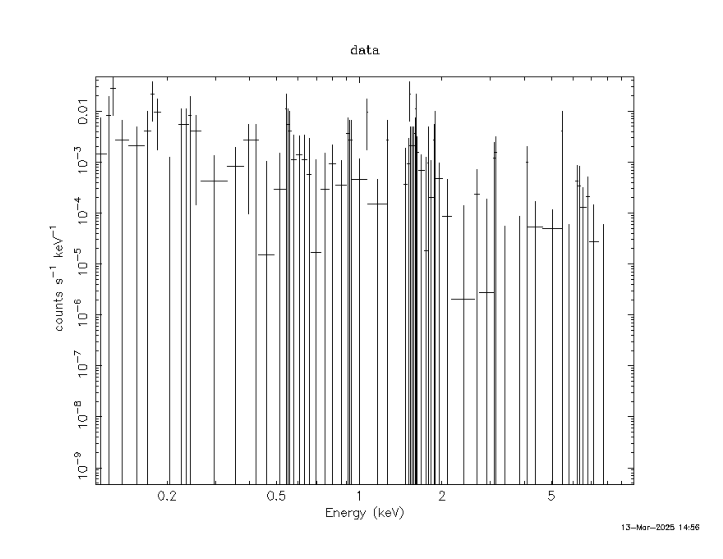

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              2.091797e+07     using 65 bins.

Te

(-0.5, 860.5, 657.5, -0.5)

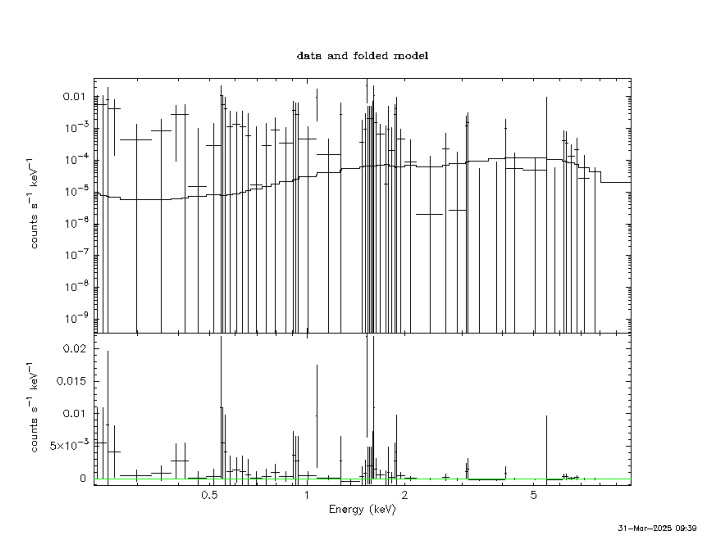

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model (Best fit)
**tbabs :**

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.674002e+06     using 65 bins.

Test statistic : Chi-Squared              2.326400e+11     using 65 bins.
 Null hypothesis probability of 0.000000e+00 with 62 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
1.71024e+06  861542       -3      0.490646       199.084      0.451051
1.14193e+06  653974       -3      0.110965       199.321      0.220662
57850.4      894856       -2     0.0266359       199.355     0.0100144


(-0.5, 860.5, 661.5, -0.5)

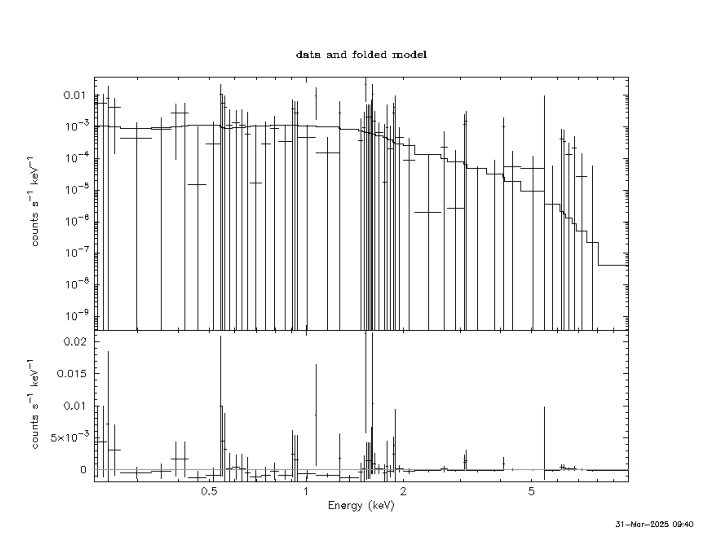

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model (Second best fit)
**tbabs :**

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic              1.648368e+06     using 65 bins.

Test statistic : Chi-Squared              3.700147e+10     using 65 bins.
 Null hypothesis probability of 0.000000e+00 with 62 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
755156       475329       -3      0.465094       44.5708   

(-0.5, 860.5, 660.5, -0.5)

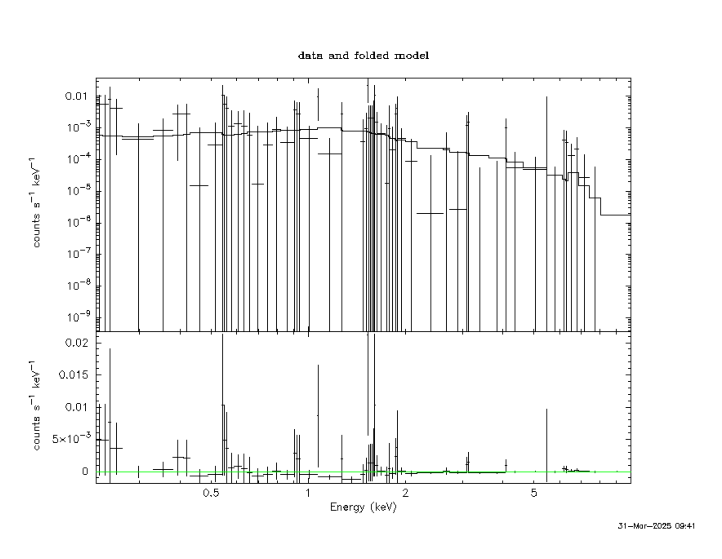

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
**tbabs :**

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.161807e+07     using 65 bins.

Test statistic : Chi-Squared              1.570626e+12     using 65 bins.
 Null hypothesis probability of 0.000000e+00 with 62 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
4.37644e+06  2.97294e+06   0      0.104340       5.75940      0.162677
86.8949      8.7003e+06   -1       2476.89     -0.248209     0.0357477
86.8949      4.35716e-07  -2       999999.      -2.07220   1.11749e+0

(-0.5, 855.5, 657.5, -0.5)

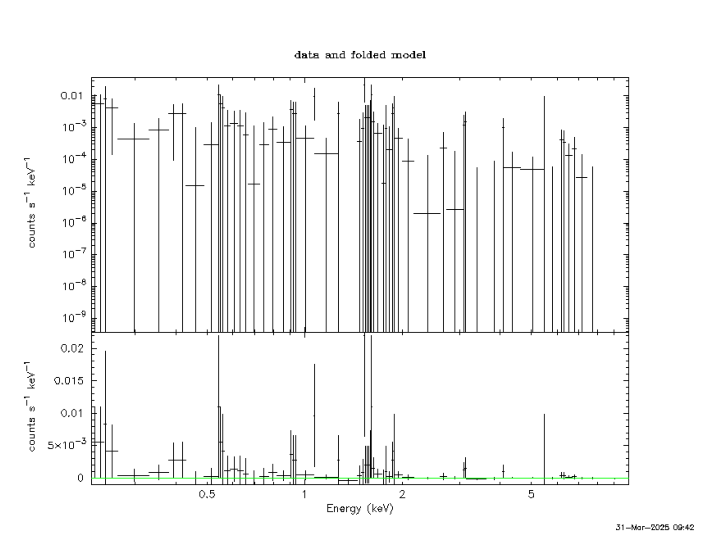

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.7376939°
- Dec = -28.6344882°

52.74 -28.63

**Column density :** nH = 2*10^20 cm^-2

In [15]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss (Best fit)"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec (Second best fit)"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 20827007197.35546

bremss (Best fit)
(tbabs) : 304320.6189185509

apec (Second best fit)
(tbabs) : 96624.48556290341

powerlaw
(tbabs) : 9.999991784934437e+27


## Flux
### X-ray flux
- X-ray Flux of the best-fitting model ``Bremsstrahlung`` with C-statistic = 62.0923 using 65 bins: **2.0031e-14 ergs/cm^2/s**.
- X-ray Flux of the second best-fitting model ``Apec`` with C-statistic = 63.3700 using 65 bins: **3.237e-14 ergs/cm^2/s**.

In [5]:
Flux_bremss = 2.0031e-14 # ergs/cm^2/s
Flux_apec = 3.237e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremsstrahlung : F_x-ray = {Flux_bremss} ergs/cm^2/s")
print(f"Apec : F_x-ray = {Flux_apec} ergs/cm^2/s")

X-ray flux : 
Bremsstrahlung : F_x-ray = 2.0031e-14 ergs/cm^2/s
Apec : F_x-ray = 3.237e-14 ergs/cm^2/s


### Optical flux
No GAIA information, so we use the lower limit of 20.7 mag.

In [6]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical flux (lower limit) : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux (lower limit) : F_optical = 5.510478332622621e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [7]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END)
print(f"Bremss : F_x-ray/F_optical = {Flux_bremss/F} ergs/cm^2/s")
print(f"Apec : F_x-ray/F_optical = {Flux_apec/F} ergs/cm^2/s")

X-ray flux / Optical flux ratio : 
Bremss : F_x-ray/F_optical = 0.36350746325258804 ergs/cm^2/s
Apec : F_x-ray/F_optical = 0.5874263184806686 ergs/cm^2/s


## Luminosity
No distance or parallax data is available on ESASky.

In [9]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1_bremss = 4*np.pi*Flux_bremss*(d1_cm)**2 # erg/s
L2_bremss = 4*np.pi*Flux_bremss*(d2_cm)**2 # erg/s
L1_apec = 4*np.pi*Flux_apec*(d1_cm)**2 # erg/s
L2_apec = 4*np.pi*Flux_apec*(d2_cm)**2 # erg/s


print(color.BOLD+"Luminosity of a galactic source with d=[1 pc - 30 kpc] :"+color.END)
print(f"Bremss : L_x-ray = [{L1_bremss}, {L2_bremss}] erg/s")
print(f"Apec : L_x-ray = [{L1_apec}, {L2_apec}] erg/s")
print()

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1_bremss = 4*np.pi*Flux_bremss*(d1_cm)**2 # erg/s
L2_bremss = 4*np.pi*Flux_bremss*(d2_cm)**2 # erg/s
L1_apec = 4*np.pi*Flux_apec*(d1_cm)**2 # erg/s
L2_apec = 4*np.pi*Flux_apec*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of an extragalactic source with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Bremss : L_x-ray = [{L1_bremss}, {L2_bremss}] erg/s")
print(f"Apec : L_x-ray = [{L1_apec}, {L2_apec}] erg/s")

Luminosity of a galactic source with d=[1 pc - 30 kpc] :
Bremss : L_x-ray = [2.396734326612346e+24, 2.3967343266123457e+30] erg/s
Apec : L_x-ray = [3.87311118528489e+24, 3.8731111852848894e+30] erg/s

Luminosity of an extragalactic source with d=[1 Mpc - 10 Gpc] :
Bremss : L_x-ray = [2.396734326612346e+36, 2.396734326612346e+44] erg/s
Apec : L_x-ray = [3.87311118528489e+36, 3.87311118528489e+44] erg/s


In [ ]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s
L_apec = 4*np.pi*Flux_apec*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L_bremss,D_pc, lw=1, color='steelblue', label="Bremss")
plt.plot(L_apec,D_pc, lw=1, color='palevioletred', label="Apec")
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.legend(loc='best')
plt.xscale("log")
plt.yscale("log")
plt.grid()